In [1]:
import sys
import os
sys.path.append(os.path.abspath("../../../../"))

import pandas as pd
import utils
# Mining: multidupehack
# Plotting
import plot_automations as plotter

Loïc Cerf and Wagner Meira Jr. Complete Discovery of High-Quality Patterns in Large Numerical Tensors. In ICDE'14: Proceedings of the 30th International Conference on Data Engineering, pages 448–459. IEEE Computer Society, April 2014.

**1. Multidupehack input file**

In [2]:
df = pd.read_csv("../../../../01_color_clustering/non-weighted/omniart-post-color-clustering.csv")

In [3]:
color_clusters = pd.read_csv("../../../../01_color_clustering/non-weighted/color_centroids.csv")

In [4]:
utils.prepare_multidupehack_input_fuzzy(df, color_clusters, "school", "fuzzy_school_mining.txt")

**2. Itemset mining**

In [5]:
patterns_df = utils.parse_patterns("school_patterns.txt", "schools")

In [6]:
hex_to_name = dict(zip(color_clusters['HEX'].str.upper(), color_clusters['name']))
    
patterns_df['colors_names'] = patterns_df['colors'].apply(
    lambda hex_list: [hex_to_name[hex.upper()] for hex in (eval(hex_list) if isinstance(hex_list, str) else hex_list)])

In [7]:
patterns_df

,schools,colors,n_schools,n_colors,support,colors_names
0,"[_Iran, _Cambodia, _Italy, _Thailand, _modern,...","[#C5B6B6, #292525, #A39695]",38,3,114,"[pinkish-grey, dark, cement]"
1,"[_Iran, _Assyria, _Unknown, _Thailand, _modern...","[#7E7373, #C5B6B6, #292525]",38,3,114,"[medium-grey, pinkish-grey, dark]"
2,"[_Iran, _Sasanian_Empire, _modern, _Thailand, ...","[#7E7373, #C5B6B6, #A39695]",38,3,114,"[medium-grey, pinkish-grey, cement]"
3,"[_Iran, _Kushan_Empire, _Thailand, _Ethiopia, ...","[#7E7373, #292525, #A39695]",38,3,114,"[medium-grey, dark, cement]"
4,"[_Iran, _modern, _Thailand, _Ethiopia, _United...","[#7E7373, #C5B6B6, #292525, #A39695]",37,4,148,"[medium-grey, pinkish-grey, dark, cement]"
...,...,...,...,...,...,...
2685,"[_Tibet, _Switzerland, _Russia, _China, _Japan...","[#7B2E28, #9A191C, #C33C43, #592C30, #61201B, ...",16,40,640,"[red-brown, carmine, reddish, purple-brown, re..."
2686,"[_Scotland, _Belgium, _China, _Russia, _Japan,...","[#7B2E28, #4B100D, #EB4D4C, #592C30, #61201B, ...",16,40,640,"[red-brown, chocolate-brown, pale-red, purple-..."
2687,"[_Scotland, _Belgium, _modern, _Russia, _Japan...","[#7B2E28, #4B100D, #280203, #EB4D4C, #592C30, ...",15,41,615,"[red-brown, chocolate-brown, very-dark-brown, ..."
2688,"[_Scotland, _China, _Russia, _Japan, _Austria,...","[#7B2E28, #4B100D, #EB4D4C, #9A191C, #592C30, ...",15,41,615,"[red-brown, chocolate-brown, pale-red, carmine..."


Plot saved to images/school_patterns_per_support_count.png


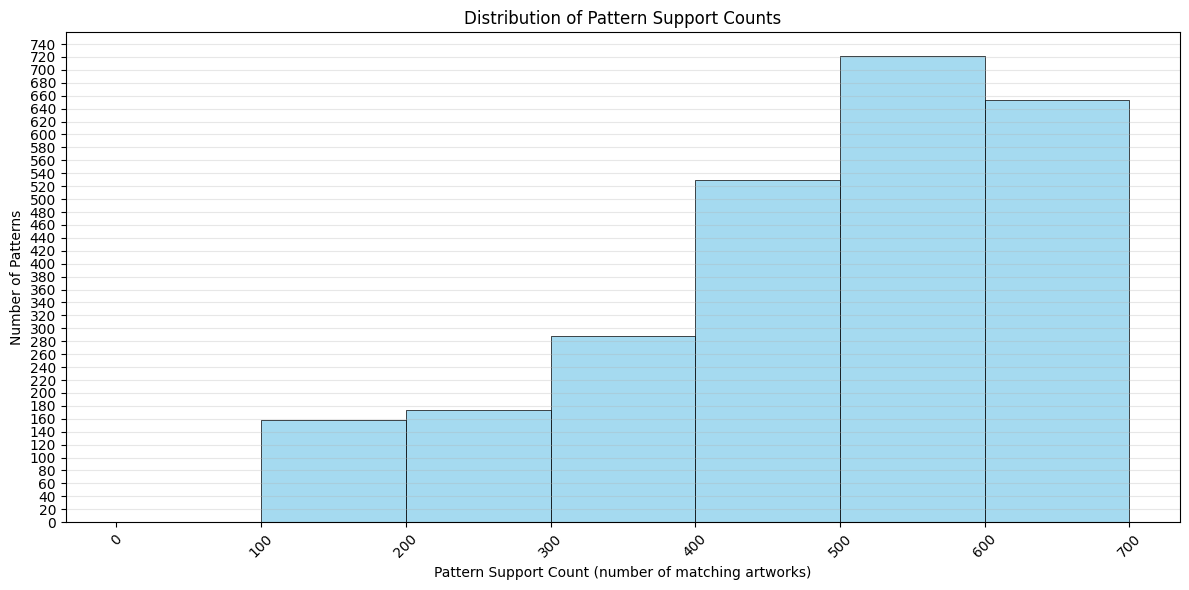

In [8]:
plotter.plot_support_analysis(patterns_df, "images/school_patterns_per_support_count.png")

Plot saved to images/school_n_school_per_pattern.png


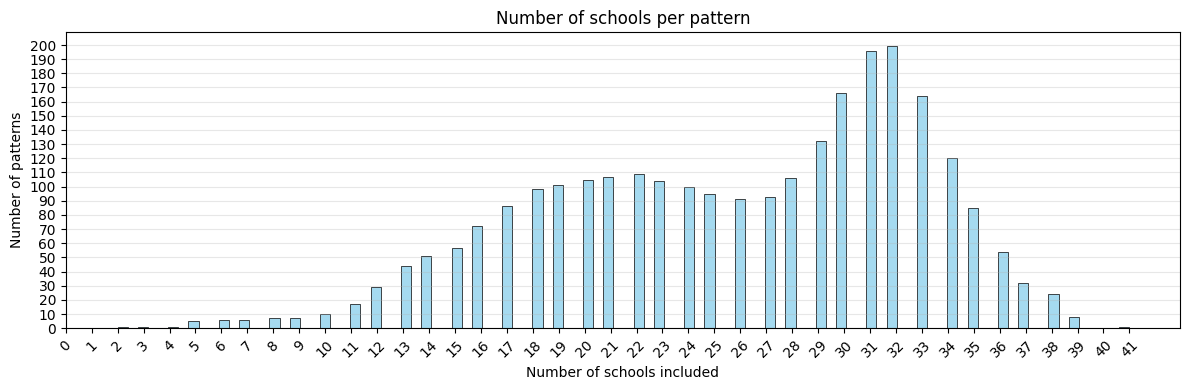

In [9]:
plotter.plot_pattern_size_distribution(patterns_df, "schools", "images/school_n_school_per_pattern.png")

Plot saved to images/school_n_colors_per_pattern.png


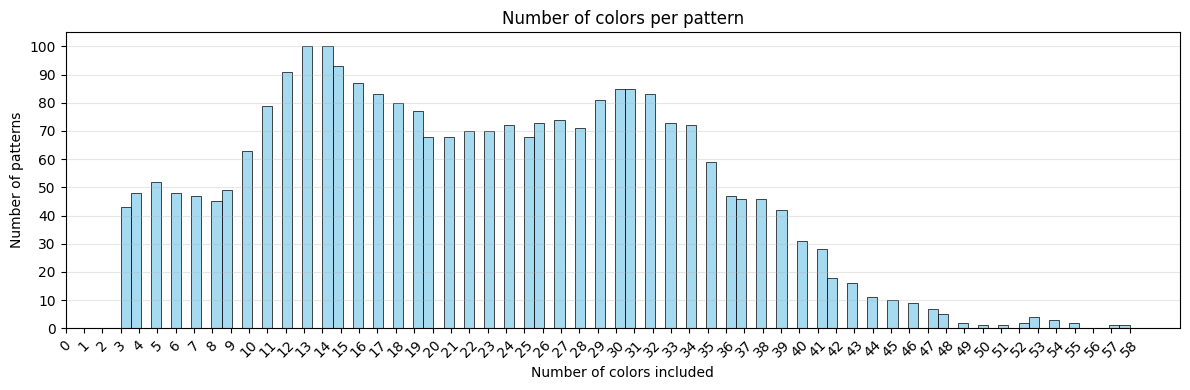

In [10]:
plotter.plot_pattern_size_distribution(patterns_df, "colors", "images/school_n_colors_per_pattern.png")

In [11]:
import matplotlib.pyplot as plt
import numpy as np
def plot_school_patterns(df, save_path=None):
    """
    Plot pattern frequency by school presence
    """
    # Explode the schools column to count each school separately
    exploded_schools = df['schools'].explode()
    
    # Count occurrences of each school
    school_counts = exploded_schools.value_counts()
    
    # Create plot
    plt.figure(figsize=(12, 6))
    ax = school_counts.plot(kind='bar', color='palevioletred')
    
    # Formatting
    plt.title("Pattern Frequency by School")
    plt.xlabel("School")
    plt.ylabel("Number of Patterns")
    
    yticks = np.arange(0, int(ax.get_ylim()[1]) + 1, 100)
    plt.yticks(yticks)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    
    # Add grid lines
    plt.grid(axis='y', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"Plot saved to {save_path}")

    plt.show()

Plot saved to images/school_pattern_frequency.png


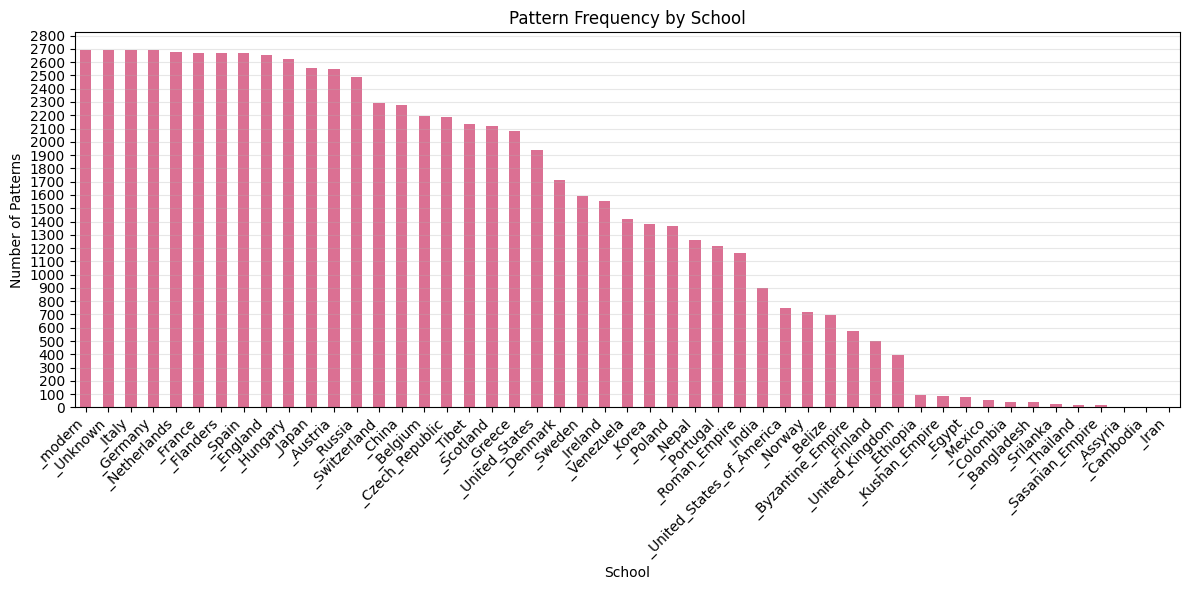

In [12]:
plot_school_patterns(patterns_df, "images/school_pattern_frequency.png")

In [13]:
plotter.plot_color_cooccurrence_matrix(patterns_df, save_path="images/color_cooccurrence_matrix.png")

In [ ]:
patterns_df['schools_range'] = patterns_df['schools'].apply(
    lambda x: f"{min(x, key=lambda s: len(s))}-{max(x, key=lambda s: len(s))}" 
    if len(x) > 1 
    else x[0]
)

In [ ]:
unique_school_ranges = patterns_df['schools_range'].unique()

In [ ]:
unique_school_ranges

In [ ]:
for school_range in unique_school_ranges:
    plotter.plot_color_grid(patterns_df, "schools", school_range, save_path=f"images/color_palettes/{school_range}.png")